In [24]:
# This is a pipeline of scRNAseq using the 500 top PCA loading genes 


In [34]:
# Load the neccessary packages

library(biomaRt)
library(Rtsne)
listMarts(host="www.ensembl.org")
ensembl = useMart(biomart = "ENSEMBL_MART_ENSEMBL",
                  dataset="mmusculus_gene_ensembl",
                  host = "oct2016.archive.ensembl.org")


biomart,version
ENSEMBL_MART_ENSEMBL,Ensembl Genes 88
ENSEMBL_MART_MOUSE,Mouse strains 88
ENSEMBL_MART_SNP,Ensembl Variation 88
ENSEMBL_MART_FUNCGEN,Ensembl Regulation 88
ENSEMBL_MART_VEGA,Vega


In [35]:
# The table with highly variant genes that was crerated in the previous step (find_high_variant_genes)
cd <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/highly_variant_genes_all_417.csv', header =T)
meta <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/metadata_all_filtered_final_417.csv',row.names=1)
head(cd)


ensembl_gene_id,meanNormCount,P2272_1004,P2272_1005,P2272_1006,P2272_1009,P2272_1010,P2272_1012,P2272_1013,P2272_1014,⋯,P7657_1181,P7657_1182,P7657_1184,P7657_1185,P7657_1186,P7657_1187,P7657_1188,P7657_1190,P7657_1191,P7657_1192
ENSMUSG00000000001,120.224183,0.0000000,0.6842291,9.6277601,0.2338652,0.000000,0.000000,0.000000,0.4840486,⋯,0.00000,0.000000,7.418372,0.0000000,0.00000,0.00000,1.099338,7.092704,0.00000,0.000000
ENSMUSG00000000031,413.967552,0.0000000,0.3823038,0.2446205,0.0000000,0.000000,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,0.000000,0.0000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
ENSMUSG00000000056,33.739029,0.3374374,5.2136259,0.0000000,3.5309297,2.275288,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,0.000000,0.8570245,0.00000,0.00000,7.592088,0.000000,0.00000,0.000000
ENSMUSG00000000058,100.081963,0.3374374,0.0000000,0.0000000,6.7239529,2.275288,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,9.136075,0.0000000,0.00000,0.00000,0.000000,0.000000,10.01324,8.492850
ENSMUSG00000000078,2210.421383,12.4018545,2.4728317,10.2844352,11.3578432,3.333222,3.732372,2.807135,8.4172492,⋯,13.05936,4.414935,4.560177,11.3359410,11.00922,10.76684,7.998825,11.794868,11.43066,7.829718
ENSMUSG00000000093,3.723828,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,2.589828,0.0000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000


In [36]:
# Translate the ensembl_gene_ids to external gene names using the online biomaRt package

genes <- cd$ensembl_gene_id
gene.list <- getBM(filters= "ensembl_gene_id",
                             attributes= c("ensembl_gene_id",
                                           "external_gene_name"),
                                           values=genes,
                                           mart= ensembl)
gene.name <- merge(cd,gene.list, by = "ensembl_gene_id")
mat <- gene.name


In [37]:
# Some data filtering and reshaping
rownames(mat) <- mat[,420]
mat <- mat[,-420]
mat <- mat[,-1]
mat <- mat[,-1]

In [38]:
# Run a principal components analysis and take the 100 top loading features from each of the first 5 PCs
base.pca <- prcomp(t(mat))
tail=as.vector(apply(base.pca$rotation[,1:5],2,function(x) tail(names(sort(x)),n=50)))
head=as.vector(apply(base.pca$rotation[,1:5],2,function(x) head(names(sort(x)),n=50)))
top.load.genes = unique(c(head,tail))
top.load.genes <- as.data.frame(top.load.genes)

In [39]:
# Some more data reshaping
colnames(top.load.genes) <- 'external_gene_name'
top.500 <- merge(top.load.genes,gene.name,by='external_gene_name')

rownames(top.500) <- top.500[,1]
top.500 <- top.500[,-1]
top.500 <- top.500[,-1]
top.500 <- top.500[,-1]

In [41]:
# Run a TSNE using the 500 top loaging features

d <- stats::dist(t(top.500))
tsne_out <- Rtsne(d,
                  dims=2,
                  initial_dims=5,
                  is_distance=TRUE,
                  perplexity=30,
                  verbose = 2,
                  theta=0.1,pca=T)


Read the 417 x 417 data matrix successfully!
Using no_dims = 2, perplexity = 30.000000, and theta = 0.100000
Computing input similarities...
Building tree...
 - point 0 of 417
Done in 0.08 seconds (sparsity = 0.300215)!
Learning embedding...
Iteration 50: error is 61.233134 (50 iterations in 0.49 seconds)
Iteration 100: error is 61.535503 (50 iterations in 0.41 seconds)
Iteration 150: error is 62.997469 (50 iterations in 0.40 seconds)
Iteration 200: error is 61.594056 (50 iterations in 0.40 seconds)
Iteration 250: error is 62.990539 (50 iterations in 0.39 seconds)
Iteration 300: error is 0.998503 (50 iterations in 0.61 seconds)
Iteration 350: error is 0.848955 (50 iterations in 0.54 seconds)
Iteration 400: error is 0.730725 (50 iterations in 0.39 seconds)
Iteration 450: error is 0.727936 (50 iterations in 0.38 seconds)
Iteration 500: error is 0.725865 (50 iterations in 0.37 seconds)
Iteration 550: error is 0.725089 (50 iterations in 0.36 seconds)
Iteration 600: error is 0.724931 (50 it

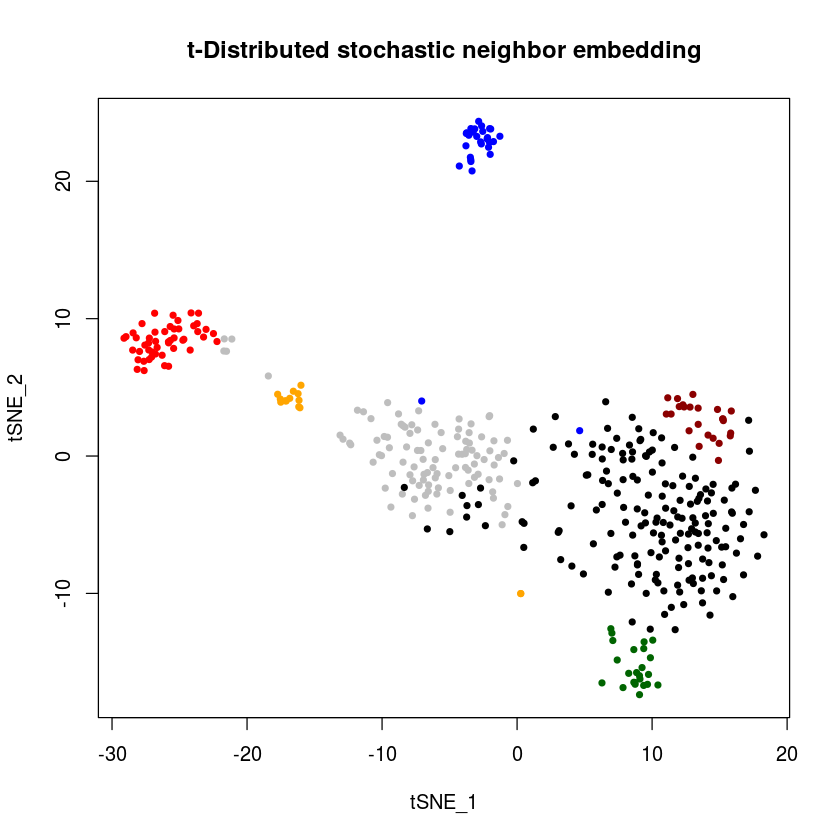

In [43]:
# Plot the results colored by the clusters derived from a previous step (clustering_analysis)

plot(tsne_out$Y[,1],tsne_out$Y[,2],pch = 20,xlab='tSNE_1',ylab='tSNE_2',
      col=c("grey","black","darkgreen","darkred","blue","orange","red")[as.numeric(meta$clusterboot2)],
      main='t-Distributed stochastic neighbor embedding')

In [44]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.1 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Rtsne_0.11     biomaRt_2.30.0

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.10         AnnotationDbi_1.36.2 magrittr_1.5        
 [4] IRanges_2.8.2        BiocGenerics_0.20.0  uuid_0.1-2          
 [7] R6_2.2.0             stringr_1.2.0        tools_3.3.1         
[10] parallel_3.3.1       Biobase_2.34.0       DBI_0.6-1           
[13] digest_0.6.12        crayon_1.3.2         IRdisplay_0.4